In [145]:
from PIL import Image
from IPython.display import display
import math
import cv2
import numpy as np
import glob

### reduce the image size first

original image size:  (500, 500)
resized image:  (200, 200)


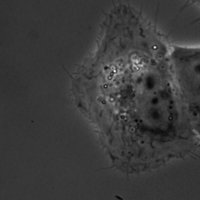

In [146]:
# test

sample_img=Image.open("../gan_data_cell_par1/par1/par1b1_s_001.jpg")
print("original image size: ",sample_img.size)
sample_img_resized = sample_img.resize((200,200),Image.ANTIALIAS)
print("resized image: ",sample_img_resized.size)
display(sample_img_resized)
sample_img_resized.save("../gan_data_cell_par1/image_scaled_opt.jpg",optimize=True,quality=95)

In [147]:
# resize the image and save it to another folder

images = glob.glob("../gan_data_cell_par1/par1/*.jpg")
count=1
for image in images:     
    with open(image, 'rb') as file:        
        img = Image.open(file)
        re_img=img.resize((200,200),Image.ANTIALIAS)
#         print(re_img.size)
        path_str="../gan_data_resized/par1/"       
        re_img.save(f'{path_str}/img_resized_{count}.jpg')
    count=count+1

### build function for image rotation and crop

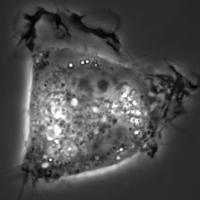

In [148]:
sample_img=Image.open("../gan_data_resized/par1/img_resized_2.jpg")
display(sample_img)

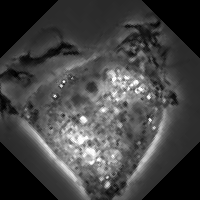

In [150]:
sample_img_rot = sample_img.rotate(45)
display(sample_img_rot)

In [151]:
sample_img_rot.size

(200, 200)

In [134]:
def rot_and_crop_disp(degree, img_size, img):
    img_rot=img.rotate(degree)
    sin_val=math.sin(math.radians(degree))
    cos_val=math.cos(math.radians(degree))
    alpha=img_size*(sin_val*cos_val/(sin_val+cos_val))  # calculated to crop the largest possible area after the rotation
    left=alpha
    upper=alpha
    right=img_size-alpha
    lower=img_size-alpha
    img_crop=img_rot.crop((left,upper,right,lower))
    print("img_rot.size",img_rot.size )
    print("left, upper, right, lower",left,upper,right,lower)
    print("img_crop.size", img_crop.size)
    return display(img_crop)

In [135]:
img_size=sample_img.size[0]
print("img_size: ",img_size)

img_size:  200


img_rot.size (200, 200)
left, upper, right, lower 1.7302078049107914 1.7302078049107914 198.2697921950892 198.2697921950892
img_crop.size (196, 196)


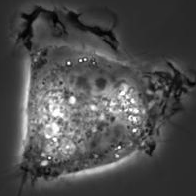

In [136]:
rot_and_crop_disp(0.5, img_size, sample_img) # test for sample image

In [137]:
def rot_and_crop_conv(degree, img_size, img):
    img_rot=img.rotate(degree)
    sin_val=math.sin(math.radians(degree))
    cos_val=math.cos(math.radians(degree))
    alpha=img_size*(sin_val*cos_val/(sin_val+cos_val))  # calculated to crop the largest possible area after the rotation
    left=alpha
    upper=alpha
    right=img_size-alpha
    lower=img_size-alpha
    img_crop=img_rot.crop((left,upper,right,lower))
    return img_crop

### apply to the whole dataset

1. 0 - 10 degrees
2. 80 - 90 degrees
3. 170 - 180 degrees
4. 270 - 280 degrees 

rotate only 5 degrees to prepare plausible cell image dataset

In [141]:
images_all = glob.glob("../gan_data_resized/par1/*.jpg")
count=1
mult_deg=0.1
# rotate from 0 to 10 degrees by 0.1
for image in images_all:     
    with open(image, 'rb') as file:        
        img = Image.open(file)
        for i in range(50):   # then total 0.1*50 = 5 degree rotation
            degree=i*mult_deg       
            img_conv = rot_and_crop_conv(degree, img_size, img)
            str_conv = "../gan_data_rot_crop/deg0to10/"
            img_conv.save(f'{str_conv}/img_deg0to10_{count}_{i}.jpg')
    count=count+1

In [142]:
# rotate from 80 to 90 degrees by 0.1
count=1
for image in images_all:     
    with open(image, 'rb') as file:        
        img = Image.open(file)
        for i in range(50):
            degree=80+i*mult_deg       
            img_conv = rot_and_crop_conv(degree, img_size, img)
            str_conv = "../gan_data_rot_crop/deg80to90/"
            img_conv.save(f'{str_conv}/img_deg80to90_{count}_{i}.jpg')
    count=count+1

In [143]:
# rotate from 170 to 180 degrees by 0.1
count=1
for image in images_all:     
    with open(image, 'rb') as file:        
        img = Image.open(file)
        for i in range(50):
            degree=170+i*mult_deg       
            img_conv = rot_and_crop_conv(degree, img_size, img)
            str_conv = "../gan_data_rot_crop/deg170to180/"
            img_conv.save(f'{str_conv}/img_deg170to180_{count}_{i}.jpg')
    count=count+1

In [144]:
# rotate from 270 to 280 degrees by 0.1
count=1
for image in images_all:     
    with open(image, 'rb') as file:        
        img = Image.open(file)
        for i in range(50):
            degree=270+i*mult_deg       
            img_conv = rot_and_crop_conv(degree, img_size, img)
            str_conv = "../gan_data_rot_crop/deg270to280/"
            img_conv.save(f'{str_conv}/img_deg270to280_{count}_{i}.jpg')
    count=count+1

In [20]:
import glob
from PIL import Image


# rotate image by 90, 180, and 270 degrees
images = glob.glob("../gan_data_cell_par1/par1/*.jpg")
count=1
for image in images:     
    with open(image, 'rb') as file:        
        img = Image.open(file)
#         display(img)
        img_rot90 = img.rotate(90)
        img_rot180 = img.rotate(180)
        img_rot270 = img.rotate(270)
#         display(img_rot90)        
        str90="../gan_data_cell_par1_rot/rot90/"
        str180="../gan_data_cell_par1_rot/rot180/"
        str270="../gan_data_cell_par1_rot/rot270/"
        
        img_rot90.save(f'{str90}/img_rot90_{count}.jpg')
        img_rot180.save(f'{str180}/img_rot180_{count}.jpg')
        img_rot270.save(f'{str270}/img_rot270_{count}.jpg')
    count=count+1
#     print(count)       